In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\Datasets\\Titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# We fill the missing values

In [6]:
# AGE

In [7]:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [8]:
df["Age"].shape

(891,)

In [9]:
def randimp(df,variable,mean,median):
    df[variable+"_mean"]=df[variable].fillna(mean)
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ran=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ran.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=ran

In [10]:
mean=df["Age"].mean()

In [11]:
median=df["Age"].median()

In [12]:
randimp(df,"Age",mean,median)

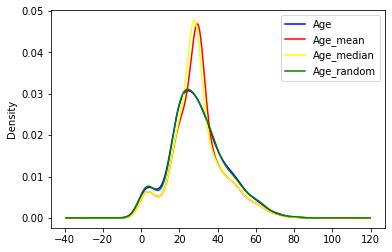

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["Age"].plot(kind="kde",ax=ax,color="blue")
df["Age_mean"].plot(kind="kde",ax=ax,color="red")
df["Age_median"].plot(kind="kde",ax=ax,color="yellow")
df["Age_random"].plot(kind="kde",ax=ax,color="green")
ax.legend()

In [14]:
# From this graph it is clear mean and median have more difference in SD compared to random sample hence choose random sample

In [15]:
df=df.drop(["Age","Age_mean","Age_median"],axis=1)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,15.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.0


In [17]:
# Embarked Column

In [18]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
mode=df["Embarked"].mode()[0]

In [20]:
df["Embarked"]=df["Embarked"].fillna(mode)

In [21]:
df.Embarked.isnull().sum()

0

In [22]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,28.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,NaN,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,NaN,C,14.0


In [23]:
# Cabin column is an ordinal data hence we use target guided ordinal encoding

In [24]:
df["Cabin"].isnull().sum()

687

In [25]:
df["Cabin"].fillna("Missing",inplace=True)

In [26]:
df["Cabin"].isnull().sum()

0

In [27]:
df["Cabin"]

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

In [28]:
# We need to get the first string

In [29]:
df["Cabin"].astype(str)

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

In [30]:
df["Cabin"].str[0]

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [31]:
df["Cabin"]=df["Cabin"].str[0]

In [32]:
# WE will find the mean

In [33]:
df.groupby(["Cabin"])["Survived"].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [34]:
# We will arrange it and store it

In [35]:
df.groupby(["Cabin"])["Survived"].mean().sort_values(ascending=False)

Cabin
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [36]:
labels=df.groupby(["Cabin"])["Survived"].mean().sort_values(ascending=False).index

In [37]:
labels

Index(['D', 'E', 'B', 'F', 'C', 'G', 'A', 'M', 'T'], dtype='object', name='Cabin')

In [38]:
ordi={k:i for i,k in enumerate(labels,0)}

In [39]:
ordi

{'D': 0, 'E': 1, 'B': 2, 'F': 3, 'C': 4, 'G': 5, 'A': 6, 'M': 7, 'T': 8}

In [40]:
df["Cabin"]=df["Cabin"].map(ordi)

In [41]:
df["Cabin"]

0      7
1      4
2      7
3      4
4      7
      ..
886    7
887    2
888    7
889    4
890    7
Name: Cabin, Length: 891, dtype: int64

In [42]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,7,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,4,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,7,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,4,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,7,S,35.0
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,7,Q,28.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,1,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,7,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,7,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,7,C,14.0


# Feature Selection

In [43]:
df.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [44]:
df.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [45]:
df.groupby(["Parch"])["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [46]:
df.groupby(["SibSp"])["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [47]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [48]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [49]:
df=df.drop("Ticket",axis=1)

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,7,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,4,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,7,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,4,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,7,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,7,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,2,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,7,S,15.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,4,C,26.0


# Data Transformation

In [51]:
# We convert embarked to numerical form

In [52]:
df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [53]:
emb=df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False).to_dict()

In [54]:
emb

{'Embarked': {0: 'C', 1: 'Q', 2: 'S'},
 'Survived': {0: 0.5535714285714286,
  1: 0.38961038961038963,
  2: 0.33900928792569657}}

In [55]:
emb=df.groupby(["Embarked"])["Survived"].mean().sort_values()

In [56]:
emb={"S":0,"Q":1,"C":2}

In [57]:
df["Embarked"]=df["Embarked"].map(emb)

In [58]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,7,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,4,2,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,7,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,4,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,7,0,35.0
5,6,0,3,"Moran, Mr. James",male,0,0,8.4583,7,1,28.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,51.8625,1,0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,21.0750,7,0,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,11.1333,7,0,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,30.0708,7,2,14.0


In [59]:
# For the Sex Column we use ONE HOT ENCODING

In [60]:
df["Sex"]=pd.get_dummies(df["Sex"],drop_first=True)

In [61]:
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: uint8

In [62]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,7.2500,7,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,71.2833,4,2,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,7.9250,7,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,53.1000,4,0,35.0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,8.0500,7,0,35.0


In [63]:
# SInce age column is in double we convert that to int

In [64]:
df["Age"]=df["Age_random"].astype(int)

In [65]:
df=df.drop("Age_random",axis=1)

In [66]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,7.2500,7,0,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,71.2833,4,2,38
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,7.9250,7,0,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,53.1000,4,0,35
4,5,0,3,"Allen, Mr. William Henry",1,0,0,8.0500,7,0,35
5,6,0,3,"Moran, Mr. James",1,0,0,8.4583,7,1,28
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,51.8625,1,0,54
7,8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,21.0750,7,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,11.1333,7,0,27
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,30.0708,7,2,14


In [67]:
# Now we will split age into 5 different categories

In [68]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df.AgeBand

0       (16.0, 32.0]
1       (32.0, 48.0]
2       (16.0, 32.0]
3       (32.0, 48.0]
4       (32.0, 48.0]
           ...      
886     (16.0, 32.0]
887     (16.0, 32.0]
888    (-0.08, 16.0]
889     (16.0, 32.0]
890     (16.0, 32.0]
Name: AgeBand, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [69]:
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.483871
3,"(48.0, 64.0]",0.402299
2,"(32.0, 48.0]",0.381974
1,"(16.0, 32.0]",0.355658
4,"(64.0, 80.0]",0.285714


In [70]:
df.groupby(["AgeBand"])["Survived"].mean()

AgeBand
(-0.08, 16.0]    0.483871
(16.0, 32.0]     0.355658
(32.0, 48.0]     0.381974
(48.0, 64.0]     0.402299
(64.0, 80.0]     0.285714
Name: Survived, dtype: float64

In [71]:

    df.loc[df["Age"]<16,"Age"]=4
    df.loc[(df["Age"]>=16)&(df["Age"]<32),"Age"]=1
    df.loc[(df["Age"]>=32)&(df["Age"]<48),"Age"]=2
    df.loc[(df["Age"]>=48)&(df["Age"]<64),"Age"]=3
    df.loc[df["Age"]>=64,"Age"]=0
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,7.2500,7,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,71.2833,4,2,2,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,7.9250,7,0,1,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,53.1000,4,0,2,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,0,0,8.0500,7,0,2,"(32.0, 48.0]"
5,6,0,3,"Moran, Mr. James",1,0,0,8.4583,7,1,1,"(16.0, 32.0]"
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,51.8625,1,0,3,"(48.0, 64.0]"


In [72]:
# Now we can remove the age_band column

In [73]:
df=df.drop(["AgeBand","Name"],axis=1)

In [74]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age
0,1,0,3,1,1,0,7.2500,7,0,1
1,2,1,1,0,1,0,71.2833,4,2,2
2,3,1,3,0,0,0,7.9250,7,0,1
3,4,1,1,0,1,0,53.1000,4,0,2
4,5,0,3,1,0,0,8.0500,7,0,2
5,6,0,3,1,0,0,8.4583,7,1,1
6,7,0,1,1,0,0,51.8625,1,0,3
7,8,0,3,1,3,1,21.0750,7,0,4
8,9,1,3,0,0,2,11.1333,7,0,1
9,10,1,2,0,1,0,30.0708,7,2,4


In [75]:
df["Fare_d"]=pd.cut(df["Fare"],5)
df["Fare_d"]

0      (-0.512, 102.466]
1      (-0.512, 102.466]
2      (-0.512, 102.466]
3      (-0.512, 102.466]
4      (-0.512, 102.466]
             ...        
886    (-0.512, 102.466]
887    (-0.512, 102.466]
888    (-0.512, 102.466]
889    (-0.512, 102.466]
890    (-0.512, 102.466]
Name: Fare_d, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [76]:
df.groupby(["Fare_d"])["Survived"].mean()

Fare_d
(-0.512, 102.466]     0.361575
(102.466, 204.932]    0.757576
(204.932, 307.398]    0.647059
(307.398, 409.863]         NaN
(409.863, 512.329]    1.000000
Name: Survived, dtype: float64

In [77]:
# From the above pivot table it is clear that we don't have any values b/w 307 and 409 so instead of dividing into 5 we divide into 4

In [78]:
df["Fare_d"]=pd.cut(df["Fare"],4)
df["Fare_d"]

0      (-0.512, 128.082]
1      (-0.512, 128.082]
2      (-0.512, 128.082]
3      (-0.512, 128.082]
4      (-0.512, 128.082]
             ...        
886    (-0.512, 128.082]
887    (-0.512, 128.082]
888    (-0.512, 128.082]
889    (-0.512, 128.082]
890    (-0.512, 128.082]
Name: Fare_d, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [79]:
df.groupby(["Fare_d"])["Survived"].mean()

Fare_d
(-0.512, 128.082]     0.368113
(128.082, 256.165]    0.724138
(256.165, 384.247]    0.666667
(384.247, 512.329]    1.000000
Name: Survived, dtype: float64

In [80]:
df.loc[df["Fare"]<128.082,"Fare"]=0
df.loc[(df["Fare"]>=128.082) & (df["Fare"]<256.165),"Fare"]=2
df.loc[(df["Fare"]>=256.165) & (df["Fare"]<384.247),"Fare"]=1
df.loc[df["Fare"]>=384.247,"Fare"]=3

In [81]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age,Fare_d
0,1,0,3,1,1,0,0.0,7,0,1,"(-0.512, 128.082]"
1,2,1,1,0,1,0,0.0,4,2,2,"(-0.512, 128.082]"
2,3,1,3,0,0,0,0.0,7,0,1,"(-0.512, 128.082]"
3,4,1,1,0,1,0,0.0,4,0,2,"(-0.512, 128.082]"
4,5,0,3,1,0,0,0.0,7,0,2,"(-0.512, 128.082]"


In [82]:
# Since Fare is in double we convert that into int

In [83]:
df["Fare"]=df["Fare"].astype(int)

In [84]:
#We now remove Fare_d and PassengerID

In [85]:
df=df.drop(["Fare_d","PassengerId"],axis=1)

In [86]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age
0,0,3,1,1,0,0,7,0,1
1,1,1,0,1,0,0,4,2,2
2,1,3,0,0,0,0,7,0,1
3,1,1,0,1,0,0,4,0,2
4,0,3,1,0,0,0,7,0,2


In [87]:
df["FamilySize"]=df["SibSp"]+df["Parch"]+1

In [88]:
df[["FamilySize","Survived"]].groupby(["FamilySize"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [89]:
df["isAlone"]=0
df.loc[df["FamilySize"]==1,"isAlone"]=1


In [90]:
df.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age,FamilySize,isAlone
0,0,3,1,1,0,0,7,0,1,2,0
1,1,1,0,1,0,0,4,2,2,2,0
2,1,3,0,0,0,0,7,0,1,1,1
3,1,1,0,1,0,0,4,0,2,2,0
4,0,3,1,0,0,0,7,0,2,1,1
5,0,3,1,0,0,0,7,1,1,1,1
6,0,1,1,0,0,0,1,0,3,1,1
7,0,3,1,3,1,0,7,0,4,5,0
8,1,3,0,0,2,0,7,0,1,3,0
9,1,2,0,1,0,0,7,2,4,2,0


In [91]:
# We will now remove the SibSp and Parch

In [92]:
df=df.drop(["SibSp","Parch"],axis=1)

In [93]:
df.head(10)

,Survived,Pclass,Sex,Fare,Cabin,Embarked,Age,FamilySize,isAlone
0,0,3,1,0,7,0,1,2,0
1,1,1,0,0,4,2,2,2,0
2,1,3,0,0,7,0,1,1,1
3,1,1,0,0,4,0,2,2,0
4,0,3,1,0,7,0,2,1,1
5,0,3,1,0,7,1,1,1,1
6,0,1,1,0,1,0,3,1,1
7,0,3,1,0,7,0,4,5,0
8,1,3,0,0,7,0,1,3,0
9,1,2,0,0,7,2,4,2,0


# TESTING DATASET

In [94]:
dk=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\Datasets\\test.csv")

In [95]:
dk.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
dk.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Filling the missing values

In [97]:
# We use the same techniques as that of training sets 

In [98]:
def randi(dk,variable,mean,median):
    dk[variable+"_mean"]=dk[variable].fillna(mean)
    dk[variable+"_median"]=dk[variable].fillna(median)
    dk[variable+"_random"]=dk[variable]
    rand=dk[variable].dropna().sample(dk[variable].isnull().sum(),random_state=1)
    rand.index=dk[dk[variable].isnull()].index
    dk.loc[dk[variable].isnull(),variable+"_random"]=rand

In [99]:
mean=dk["Age"].mean()
median=dk["Age"].median()
randi(dk,"Age",mean,median)


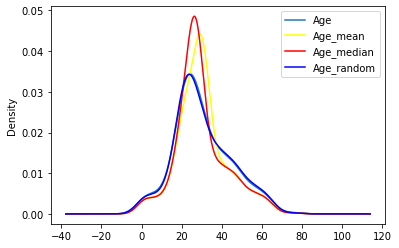

In [100]:
fig=plt.figure()
ax=fig.add_subplot(111)
dk["Age"].plot(kind="kde",ax=ax)
dk["Age_mean"].plot(kind="kde",ax=ax,color="yellow")
dk["Age_median"].plot(kind="kde",ax=ax,color="red")
dk["Age_random"].plot(kind="kde",ax=ax,color="blue")
ax.legend()

In [101]:
dk=dk.drop(["Age","Age_mean","Age_median"],axis=1)

In [102]:
dk["Age_random"]=dk["Age_random"].astype(int)

In [103]:
dk.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22


In [104]:
dk["Age"]=dk["Age_random"]
dk=dk.drop("Age_random",axis=1)

In [105]:
dk.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22


In [106]:
dl=dk.copy()

In [107]:
dk["Age_d"]=pd.cut(dk["Age"],5)
dk.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Age_d
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34,"(30.4, 45.6]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47,"(45.6, 60.8]"
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62,"(60.8, 76.0]"
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27,"(15.2, 30.4]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22,"(15.2, 30.4]"


In [108]:
dk.loc[dk["Age"]<16,"Age"]=4
dk.loc[(dk["Age"]>=16)&(dk["Age"]<32),"Age"]=1
dk.loc[(dk["Age"]>=32)&(dk["Age"]<48),"Age"]=2
dk.loc[(dk["Age"]>=48)&(dk["Age"]<64),"Age"]=3
dk.loc[dk["Age"]>=64,"Age"]=0
dk.head(7)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Age_d
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,2,"(30.4, 45.6]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,2,"(45.6, 60.8]"
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,3,"(60.8, 76.0]"
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,1,"(15.2, 30.4]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,1,"(15.2, 30.4]"
5,897,3,"Svensson, Mr. Johan Cervin",male,0,0,7538,9.2250,NaN,S,4,"(-0.076, 15.2]"
6,898,3,"Connolly, Miss. Kate",female,0,0,330972,7.6292,NaN,Q,1,"(15.2, 30.4]"


In [109]:
dk=dk.drop("Age_d",axis=1)

In [110]:
# Embarked column

In [111]:
emb={"S":0,"Q":1,"C":2}
dk["Embarked"]=dk["Embarked"].map(emb)
dk.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,1,3
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,0,1


In [112]:
# Cabin

In [113]:
dk["Cabin"]=dk["Cabin"].fillna("Missing")

In [114]:
dk["Cabin"]=dk["Cabin"].astype(str).str[0]
dk.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,M,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,M,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,M,1,3
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,M,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,M,0,1


In [115]:
ordi={'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}
dk["Cabin"]=dk["Cabin"].map(ordi)
dk.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,1,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,1,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,1,1,3
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,1,0,1


In [116]:
# Fare column

In [117]:
dl=dk.copy()

In [118]:
dk.loc[dk["Fare"]<128.082,"Fare"]=0
dk.loc[(dk["Fare"]>=128.082) & (dk["Fare"]<256.165),"Fare"]=1
dk.loc[(dk["Fare"]>=256.165) & (dk["Fare"]<384.247),"Fare"]=2
dk.loc[dk["Fare"]>=384.247,"Fare"]=3
dk.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,0.0,1,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,0.0,1,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,0.0,1,1,3
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,0.0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,0.0,1,0,1


In [119]:
dl.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Age            0
dtype: int64

In [120]:
dk=dl.copy()
dk.head(10)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,1,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,1,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,1,1,3
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,1,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,0,0,7538,9.2250,1,0,4
6,898,3,"Connolly, Miss. Kate",female,0,0,330972,7.6292,1,1,1
7,899,2,"Caldwell, Mr. Albert Francis",male,1,1,248738,29.0000,1,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,0,0,2657,7.2292,1,2,1
9,901,3,"Davies, Mr. John Samuel",male,2,0,A/4 48871,24.1500,1,0,1


In [121]:
dk["Fare"]=dk["Fare"].fillna(dk["Fare"].median())

In [122]:
dk.loc[dk["Fare"]<128.082,"Fare"]=1
dk.loc[(dk["Fare"]>=128.082) & (dk["Fare"]<256.165),"Fare"]=2
dk.loc[(dk["Fare"]>=256.165) & (dk["Fare"]<384.247),"Fare"]=3
dk.loc[dk["Fare"]>=384.247,"Fare"]=4
dk["Fare"]=dk["Fare"].astype(int)
dk.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,1,1,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1,1,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,1,1,1,3
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,1,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,1,1,0,1


In [123]:
# Family Size

In [124]:
dk["FamilySize"]=dk["SibSp"]+dk["Parch"]+1


In [125]:
dk["isAlone"]=0
dk.loc[dk["FamilySize"]==1,"isAlone"]=1
dk.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,FamilySize,isAlone
0,892,3,"Kelly, Mr. James",male,0,0,330911,1,1,1,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1,1,0,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,1,1,1,3,1,1
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,1,1,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,1,1,0,1,3,0


In [126]:
dk["Sex"]=pd.get_dummies(dk["Sex"],drop_first=True)

In [127]:
dk.head(10)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,FamilySize,isAlone
0,892,3,"Kelly, Mr. James",1,0,0,330911,1,1,1,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,1,1,0,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,1,1,1,3,1,1
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,1,1,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,1,1,0,1,3,0
5,897,3,"Svensson, Mr. Johan Cervin",1,0,0,7538,1,1,0,4,1,1
6,898,3,"Connolly, Miss. Kate",0,0,0,330972,1,1,1,1,1,1
7,899,2,"Caldwell, Mr. Albert Francis",1,1,1,248738,1,1,0,1,3,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0,0,2657,1,1,2,1,1,1
9,901,3,"Davies, Mr. John Samuel",1,2,0,A/4 48871,1,1,0,1,3,0


In [128]:
dk=dk.drop(["PassengerId","Name","SibSp","Parch","Ticket"],axis=1)
dk.head()

,Pclass,Sex,Fare,Cabin,Embarked,Age,FamilySize,isAlone
0,3,1,1,1,1,2,1,1
1,3,0,1,1,0,2,2,0
2,2,1,1,1,1,3,1,1
3,3,1,1,1,0,1,1,1
4,3,0,1,1,0,1,3,0


In [129]:
dk.shape

(418, 8)

In [130]:
df.head()


,Survived,Pclass,Sex,Fare,Cabin,Embarked,Age,FamilySize,isAlone
0,0,3,1,0,7,0,1,2,0
1,1,1,0,0,4,2,2,2,0
2,1,3,0,0,7,0,1,1,1
3,1,1,0,0,4,0,2,2,0
4,0,3,1,0,7,0,2,1,1


# Machine Learning Algo's

In [131]:
import random as rnd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [132]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_test  = dk.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [133]:
# Logistic Regression

logreg = LogisticRegression()
# Training the model
logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)
# Finding the training accuracy
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.91

In [134]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
#Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.26

In [135]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
#Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.07

In [136]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
#Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.1

In [137]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
#Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.01

In [138]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
#Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


80.02

In [139]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
#Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.5

In [140]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.11

In [141]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.11

In [142]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.11
8,Decision Tree,89.11
1,KNN,85.07
0,Support Vector Machines,81.26
7,Linear SVC,80.02
2,Logistic Regression,79.91
5,Perceptron,79.01
4,Naive Bayes,77.10
6,Stochastic Gradient Decent,72.50
